In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot #to check assumption made by regression
import statsmodels.formula.api as smf #to import ordinal least square method
import matplotlib.pyplot as plt


In [11]:
df=pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
#Change of column name

df.rename(columns = {'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, inplace = True)

In [13]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [15]:
df.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

Text(0, 0.5, 'Delivery time')

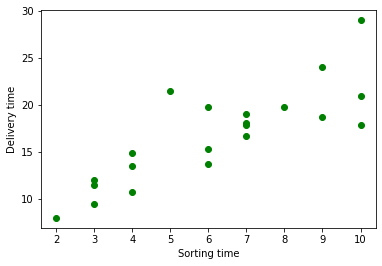

In [16]:
plt.scatter(x=df.Sorting_Time, y=df.Delivery_Time, color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x20c3dc299d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c3dc2e0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c3dc297c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c3dc2e7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c3dc2eb50>],
 'means': []}

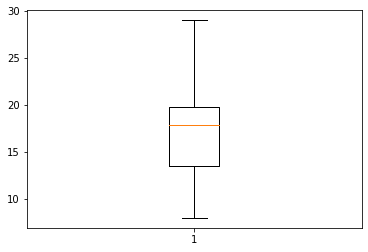

In [17]:
plt.boxplot(df.Delivery_Time)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c3dc92f70>,
 'caps': [<matplotlib.lines.Line2D at 0x20c3dca26d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c3dc92be0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c3dca2df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c3dcb01c0>],
 'means': []}

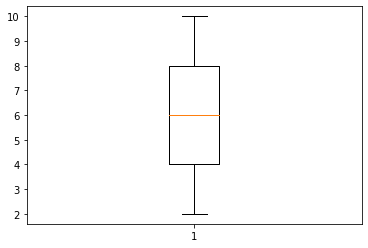

In [18]:
plt.boxplot(df.Sorting_Time)

In [20]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


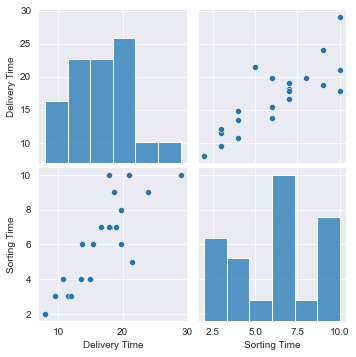

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [22]:
#Building of model
import statsmodels.formula.api as smf
model=smf.ols('Delivery_Time ~ Sorting_Time',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        19:23:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

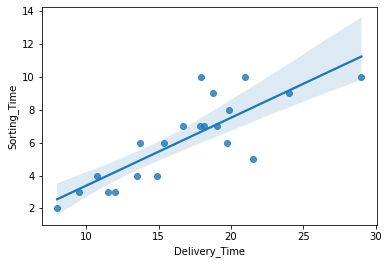

In [23]:
#regression plot
sns.regplot(x='Delivery_Time',y='Sorting_Time',data=df)

In [24]:
#tvalue&pvalue
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [35]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [42]:
newdata=pd.Series([10,6,19])
newdata

0    10
1     6
2    19
dtype: int64

In [43]:
data_pred=pd.DataFrame(data=newdata,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,10
1,6
2,19


In [44]:
model.predict(data_pred)

0    23.072933
1    16.476853
2    37.914112
dtype: float64